## GROUP ANALYSIS

Group Analysis

In [1]:
# Import required libraries/functions
from __future__ import print_function, division
import sys

# Import custom code from module om, including general functions and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general om code
from om.cl.md_sing import *             # Import Meg-Data code & classes for Single Subject
from om.cl.md_gr import *               # Import Meg-Data code & classes for Group
from om.plts.md_plts import *           # Import plots for Meg-Data

# Set plots to display inline
%matplotlib inline

In [5]:
# Check what data is available
sub_nums, source = db.check_dat_files('foof')


Number of Subjects available: 85

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341, 100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671]



In [4]:
# Initialize MegGroup object
osc = Osc(default=True)
meg_group = GroupMegData(db, osc)

In [6]:
# Add subjects to meg_group
for i, subj in enumerate(sub_nums[0:2]):
    meg_subj = MegData(OMDB(source[i]))                # Initialize MegData object
    meg_subj.import_foof(subj, get_demo=True)          # Import subject data
    meg_subj.all_oscs()                                # Create vectors of all oscillations
    meg_subj.peak_freq(osc)                            # Calculate peak frequencies
    meg_subj.osc_bands_vertex(osc)                     # Get oscillations per band per vertex
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=True,               # Whether to include all-osc data
                          add_vertex_bands=True,           # Whether to include osc-band-vertex data
                          add_peak_freqs = True,           # Whether to include peak frequency data
                          add_vertex_oscs=False,           # Whether to include all-osc data for each vertex
                          add_vertex_slopes=True)          # Whether to include the slopes per vertex across subjects

Subj: 111802 Found 111  NaNs. Removing.


In [7]:
# OR: Check available saved files to load one of them
md_files = db.check_res_files('md')


Number of files available: 4

Files available: 
Res_Group_67_all_osc_2016-10-02.p
Res_Group_67_vertex_osc_2016-10-02.p
Res_Group_85_all_oscs_2016-11-02.p
Res_Group_85_vertex_osc_2016-11-02.p



In [ ]:
# Load a pickled file
meg_group = load_md_pickle(md_files[0])

In [8]:
# Check how many subjects group includes
print('Currently analyzing ' + str(meg_group.n_subjs) + ' subjects.')

Currently analyzing 2 subjects.


Number of oscillations found across the whole group: 47435



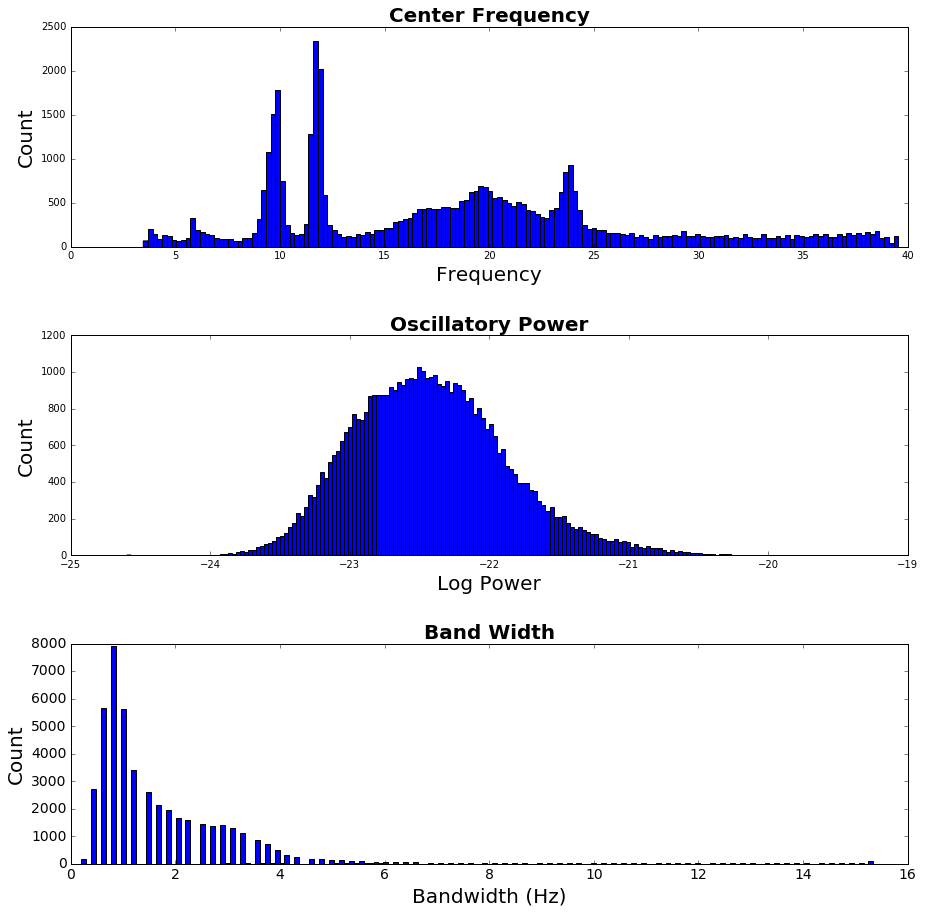

In [9]:
# Plot all oscillations across the group
print('Number of oscillations found across the whole group: ' + str(meg_group.n_oscs_tot) + '\n')
plot_all_oscs(meg_group.centers_all, meg_group.powers_all, meg_group.bws_all, meg_group.title, save_out=False)

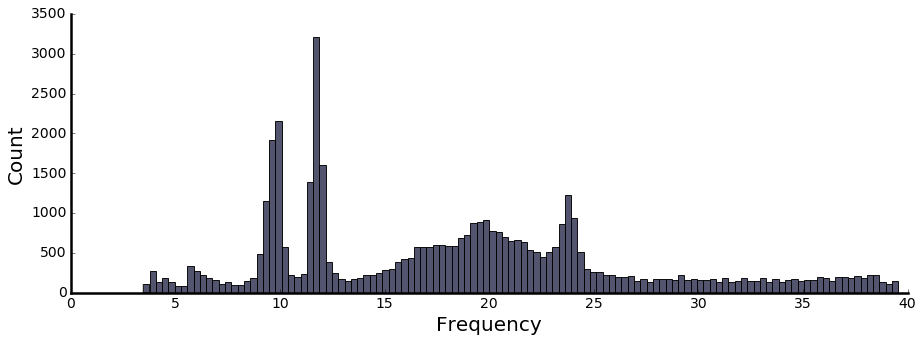

In [10]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_group.centers_all, 0, meg_group.title, n_bins=120, size=(15, 5), save_out=False)

In [13]:
# Calculate correlations between oscillatory parameters
gr_rs_mat, gr_ps_mat, param_labels = meg_group.calc_osc_param_corrs()
print_corrs_mat(gr_rs_mat, gr_ps_mat, param_labels)

Corr of  Centers-Powers      is  -0.4830     with p-val of  0.00000
Corr of  Centers-Bandwidths  is  +0.3673     with p-val of  0.00000
Corr of  Powers-Bandwidths   is  -0.2742     with p-val of  0.00000


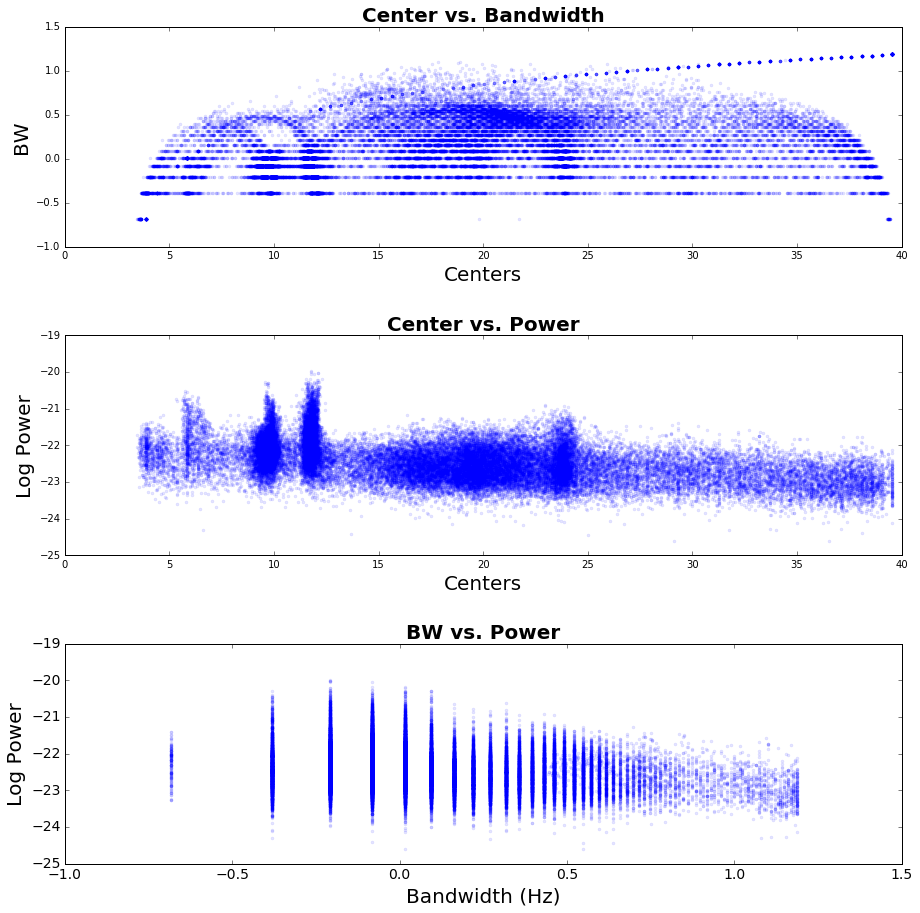

In [14]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_group.centers_all, meg_group.powers_all, meg_group.bws_all, meg_group.title)

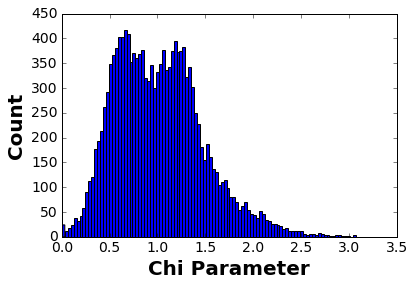

In [15]:
# Plot distribution of all slopes
plot_slopes(meg_group.slopes, meg_group.title)

In [16]:
# Calculate Average Slope per Vertex
meg_group.group_slope(avg='median')

In [ ]:
# Save out group slope results
meg_group.save_gr_slope(file_name='Res_Group_85')

In [ ]:
# Set group slope results for visualization with Brainstorm
meg_group.set_slope_viz()

In [17]:
# Calculate probability of oscilation (band specific) across the cortex
meg_group.osc_prob()

In [18]:
# Correlations between probabilities of oscillatory bands. 
prob_rs, prob_ps, prob_labels = meg_group.osc_map_corrs(map_type='prob')
print_corrs_mat(prob_rs, prob_ps, prob_labels)

Corr of  Theta-Alpha         is  +0.0338     with p-val of  0.00338
Corr of  Theta-Beta          is  -0.3113     with p-val of  0.00000
Corr of  Theta-LowGamma      is  +0.0979     with p-val of  0.00000
Corr of  Alpha-Beta          is  -0.0473     with p-val of  0.00004
Corr of  Alpha-LowGamma      is  -0.1328     with p-val of  0.00000
Corr of  Beta-LowGamma       is  +0.0540     with p-val of  0.00000


In [ ]:
# Save group oscillation probability data for visualization with Brainstorm
meg_group.set_map_viz(dat_type='prob')

In [ ]:
# Save group oscillation probability data out to npz file
meg_group.save_map(map_type='prob', file_name='Res_Group_85')

In [ ]:
# Calculate oscillation score
meg_group.osc_score()

In [ ]:
# Save group oscillation probability data for visualization with Brainstorm
meg_group.set_map_viz(dat_type='score')

In [ ]:
# Save group oscillation score data out to npz file
meg_group.save_map(map_type='score', file_name='Res_Group_85')

In [ ]:
# Correlations between osc-scores of oscillatory bands. 
score_rs, score_ps, score_labels = meg_group.osc_map_corrs(map_type='score')
print_corrs_mat(score_rs, score_ps, score_labels)

In [ ]:
# Plot the oscillation band correlation matrix
plot_band_corr_matrix(score_rs, save_out=False)

## Individual Variation

In [ ]:
# Plot the peak frequency boxplot
band = 'Theta'
plot_peak_boxplot(meg_group.peaks[band], band, save_out=False)

In [ ]:
# Plot the individual oscillation profiles figure
plot_osc_profiles(meg_group.centers_hist, save_out=False)

In [ ]:
# Save out pickle file of current GroupMegData() object
save_md_pickle(meg_group, 'Group_85_all_oscs')

## Demographics

We have limited demographic information with the MEG databases.


OMEGA: At a minimum, for each subject we have birth year, giving us approximate age, and sex. 

HCP: For each subject, we only have an age range (age within ~5 years), and sex. 

In [19]:
# Check demographics
print('Ages range from ', min(meg_group.age), ' to ', max(meg_group.age), 
      ' with an average of ', np.mean(meg_group.age))
print('There are ', meg_group.sex.count('M'), ' males and ', meg_group.sex.count('F'), 'females.')

Ages range from  24.0  to  29.0  with an average of  26.5
There are  1  males and  1 females.


In [20]:
# Check correlations between age and peak frequency within oscillation bands
age_peak_rs, age_peak_ps, labels = meg_group.calc_osc_peak_age()
print_corrs_vec(age_peak_rs, age_peak_ps, labels, 'Age')

Corr of  Theta-Age             is  -1.0000     with p-val of  0.00000
Corr of  Alpha-Age             is  +1.0000     with p-val of  0.00000
Corr of  Beta-Age              is  -1.0000     with p-val of  0.00000
Corr of  LowGamma-Age          is  -1.0000     with p-val of  0.00000


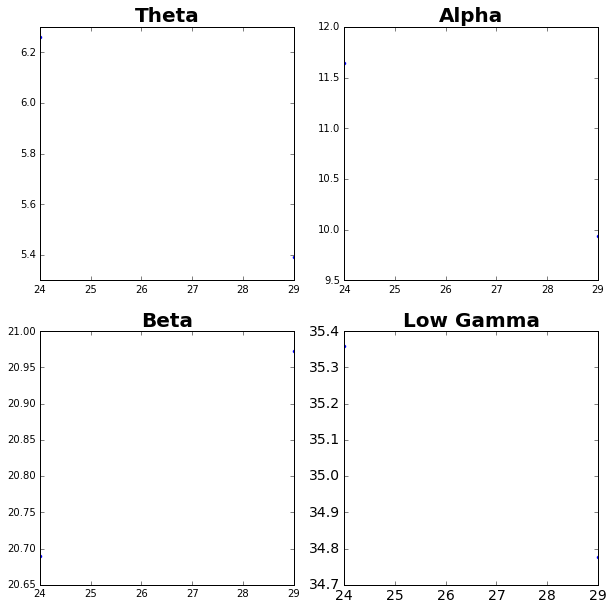

In [21]:
# Plot comparisons between age and oscillation peaks
plot_age_peak(meg_group.age, meg_group.peaks['Theta'], meg_group.peaks['Alpha'], 
              meg_group.peaks['Beta'], meg_group.peaks['LowGamma'], save_out=False)

In [22]:
# Check for correlation between number of oscillations found and age.
[r_age_nOsc, p_age_nOsc] = pearsonr(meg_group.age, meg_group.n_oscs)
print('Corr of # Oscillations / Age is ', '{:+1.4f}'.format(r_age_nOsc), 
          ' with p-val of ', '{:1.5f}'.format(p_age_nOsc), '\n')

Corr of # Oscillations / Age is  +1.0000  with p-val of  0.00000 



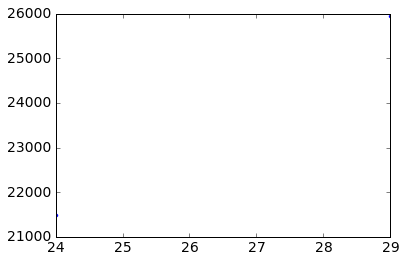

In [23]:
# Scatter plot comparing age and number of oscillations
plot_age_n_oscs(meg_group.age, meg_group.n_oscs, save_out=False)

In [24]:
# Get inds of male and female subjects
m_inds = [i for i, x in enumerate(meg_group.sex) if x == "M"]
f_inds = [i for i, x in enumerate(meg_group.sex) if x == "F"]

# NOTE: I explored a couple parameters, such as nOscs and peak-band-oscs, to see if anything looked different. 
# Total fishing expedition, and not enough subjects to really see anything. Revisit with more subjects. 